In [1]:
import syft as sy

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/shubham/PySyft


In [2]:
# gateway = sy.orchestra.launch(name="gateway" ,node_type="gateway", deploy_to="container_stack",dev_mode=True)
gateway = sy.orchestra.launch(name="gateway" ,node_type="gateway",dev_mode=True, reset=True)

Message:  Cannot create client for: TailscaleClient


In [3]:
domain =  sy.orchestra.launch(name="domain",node_type = "domain", dev_mode=True, reset=True) 

In [4]:
domain_client = sy.login(node=domain.python_node,email="info@openmined.org", password = "changethis")

Logged into domain as <info@openmined.org>


In [5]:
domain_client.domains

[]

In [6]:
domain_client.metadata

NodeMetadataJSON(metadata_version=1, name='domain', id='f2ff83860a4d4203988ed1a22ba1f212', verify_key='d31bba8064cc43f4bd3f9f376c26c4fd50d69f08299fe90263e3fef013a9b87f', highest_object_version=2, lowest_object_version=1, syft_version='0.8.2-beta.2', node_type='domain', deployed_on='07/06/2023', organization='OpenMined', on_board=False, description='Text', signup_enabled=False)

In [7]:
gateway_client = sy.login(node=gateway.python_node)

Logged into gateway as GUEST


In [8]:
gateway_client.metadata

NodeMetadataJSON(metadata_version=1, name='gateway', id='4ea5ee68fea04586906890ded5733820', verify_key='9c1cc50dd9eedad4ecc9cfce2906befb205909117b6e51f9cf862be33bb19d8e', highest_object_version=2, lowest_object_version=1, syft_version='0.8.2-beta.2', node_type='gateway', deployed_on='07/06/2023', organization='OpenMined', on_board=False, description='Text', signup_enabled=False)

In [9]:
gateway_client.credentials

<SigningKey for: dd6e01a15c8dc8ae88a2b20c2dbfd24d0b6501cdc7c86fd55d2e2c120c9a894f>

In [10]:
domain_client.credentials, domain_client.credentials.verify_key

(<SigningKey for: d31bba8064cc43f4bd3f9f376c26c4fd50d69f08299fe90263e3fef013a9b87f>,
 d31bba8064cc43f4bd3f9f376c26c4fd50d69f08299fe90263e3fef013a9b87f)

In [11]:
domain_client.apply_to_gateway(gateway_client)

<class 'syft.service.response.SyftSuccess'>: Routes Exchanged

In [12]:
domain_client.credentials, domain_client.credentials.verify_key

(<SigningKey for: d31bba8064cc43f4bd3f9f376c26c4fd50d69f08299fe90263e3fef013a9b87f>,
 d31bba8064cc43f4bd3f9f376c26c4fd50d69f08299fe90263e3fef013a9b87f)

In [13]:
gateway_client.credentials

<SigningKey for: dd6e01a15c8dc8ae88a2b20c2dbfd24d0b6501cdc7c86fd55d2e2c120c9a894f>

In [14]:
domain_client.register(email="sheldon@caltech.edu", 
                      password="changethis", 
                      name="Sheldon")

<class 'syft.service.response.SyftSuccess'>: User 'Sheldon' successfully registered! To see users, run `[your_client].users`

In [15]:
gateway_client.domains

[syft.service.network.node_peer.NodePeer]

In [16]:
gateway_client.domains[0]

```python
class NodePeer:
  id: str = f2ff83860a4d4203988ed1a22ba1f212
  name: str = "domain"

```

In [17]:
proxy_domain_client = gateway_client.proxy_to(gateway_client.domains[0])

<ProxyClient - <f2ff83860a4d4203988ed1a22ba1f212>: via f2ff83860a4d4203988ed1a22ba1f212 PythonConnection>
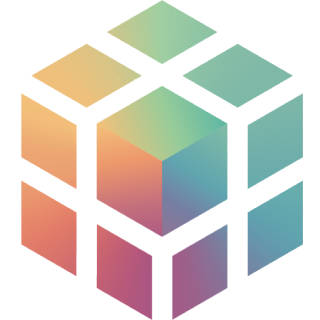

In [18]:
proxy_domain_client

In [19]:
proxy_domain_client.credentials

<SigningKey for: dd6e01a15c8dc8ae88a2b20c2dbfd24d0b6501cdc7c86fd55d2e2c120c9a894f>

In [20]:
proxy_domain_client.register(name="Shubham", email="shubham@openmined.org", password="password")

<class 'syft.service.response.SyftError'>: You don't have permission to create an account on the domain: domain. Please contact the Domain Owner.

Logged into domain as <info@openmined.org>


<ProxyClient - <f2ff83860a4d4203988ed1a22ba1f212>: via f2ff83860a4d4203988ed1a22ba1f212 PythonConnection>
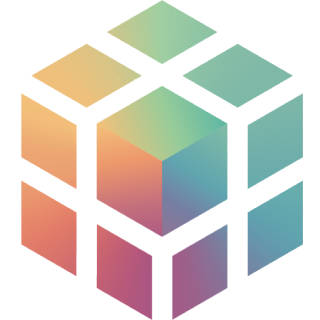

In [21]:
proxy_domain_client.login(email="info@openmined.org", password="changethis")

<ProxyClient - <f2ff83860a4d4203988ed1a22ba1f212>: via f2ff83860a4d4203988ed1a22ba1f212 PythonConnection>
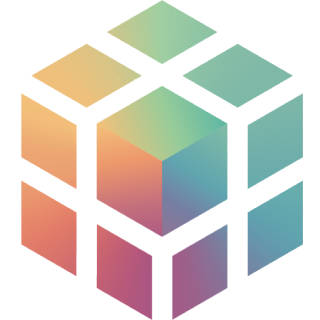

In [22]:
proxy_domain_client

In [23]:
proxy_domain_client.credentials

<SigningKey for: d31bba8064cc43f4bd3f9f376c26c4fd50d69f08299fe90263e3fef013a9b87f>

In [24]:
proxy_domain_client.api.endpoints

{'data_subject.add': APIEndpoint(syft_node_location=None, syft_client_verify_key=None, service_path='data_subject.add', module_path='data_subject.add', name='add_data_subject', description='', doc_string='Register a data subject.', signature=<Signature (data_subject: syft.service.data_subject.data_subject.DataSubjectCreate) -> Union[syft.service.response.SyftSuccess, syft.service.response.SyftError]>, has_self=False, pre_kwargs=None),
 'data_subject.get_all': APIEndpoint(syft_node_location=None, syft_client_verify_key=None, service_path='data_subject.get_all', module_path='data_subject.get_all', name='get_all', description='', doc_string='Get all Data subjects', signature=<Signature () -> Union[List[syft.service.data_subject.data_subject.DataSubject], syft.service.response.SyftError]>, has_self=False, pre_kwargs=None),
 'data_subject.get_members': APIEndpoint(syft_node_location=None, syft_client_verify_key=None, service_path='data_subject.get_members', module_path='data_subject.get_members', name='members_for', description='', doc_string=None, signature=<Signature (data_subject_name: str) -> Union[List[syft.service.data_subject.data_subject.DataSubject], syft.service.response.SyftError]>, has_self=False, pre_kwargs=None),
 'data_subject.get_by_name': APIEndpoint(syft_node_location=None, syft_client_verify_key=None, service_path='data_subject.get_by_name', module_path='data_subject.get_by_name', name='get_by_name', description='', doc_string='Get a Data Subject by its name.', signature=<Signature (name: str) -> Union[syft.service.response.SyftSuccess, syft.service.response.SyftError]>, has_self=False, pre_kwargs=None),
 'user.create': APIEndpoint(syft_node_location=None, syft_client_verify_key=None, service_path='user.create', module_path='user.create', name='create', description='', doc_string='Create a new user', signature=<Signature (user_create: syft.service.user.user.UserCreate) -> Union[syft.service.user.user.UserView, syft.service.response.SyftError]>, has_self=False, pre_kwargs=None),
 'user.view': APIEndpoint(syft_node_location=None, syft_client_verify_key=None, service_path='user.view', module_path='user.view', name='view', description='', doc_string='Get user for given uid', signature=<Signature (uid: syft.types.uid.UID) -> Union[syft.service.user.user.UserView, None, syft.service.response.SyftError]>, has_self=False, pre_kwargs=None),
 'user.get_all': APIEndpoint(syft_node_location=None, syft_client_verify_key=None, service_path='user.get_all', module_path='user.get_all', name='get_all', description='', doc_string=None, signature=<Signature (page_size: Union[int, None] = 0, page_index: Union[int, None] = 0) -> Union[syft.service.user.user.UserView, None, syft.service.response.SyftError]>, has_self=False, pre_kwargs=None),
 'user.search': APIEndpoint(syft_node_location=None, syft_client_verify_key=None, service_path='user.search', module_path='user.search', name='search', description='', doc_string=None, signature=<Signature (args: Any, id: syft.types.uid.UID, email: pydantic.networks.EmailStr, verify_key: syft.node.credentials.SyftVerifyKey, name: str, syft_node_location: Union[syft.types.uid.UID, None] = None, syft_client_verify_key: Union[syft.node.credentials.SyftVerifyKey, None] = None, page_size: Union[int, None] = 0, page_index: Union[int, None] = 0) -> Union[List[syft.service.user.user.UserView], syft.service.response.SyftError]>, has_self=False, pre_kwargs=None),
 'user.update': APIEndpoint(syft_node_location=None, syft_client_verify_key=None, service_path='user.update', module_path='user.update', name='update', description='', doc_string=None, signature=<Signature (uid: syft.types.uid.UID, user_update: syft.service.user.user.UserUpdate) -> Union[syft.service.user.user.UserView, syft.service.response.SyftError]>, has_self=False, pre_kwargs=None),
 'user.delete': APIEndpoint(syft_node_location=None, syft_client_verify_key=None, service_path='user.delete', module_path='user.delete', name='delete', description=

In [25]:
domain_client.users

In [26]:
proxy_domain_client.register(name="Shubham", email="shubham@openmined.org", password="password")

<class 'syft.service.response.SyftSuccess'>: User 'Shubham' successfully registered! To see users, run `[your_client].users`

In [27]:
domain_client.users

In [28]:
domain_client.datasets